# 4. Working with larger data sets

This workbook uses a large sample dataset in order to more realistically simulate the set up of the analysis process from start to finish. The dataset is not included directly with this code but can be downloaded from Zenodo - https://zenodo.org/record/3630511#.XjHhJGj7SUl

We assume that you have downloaded the data, unpacked it and placed it in the *example_data* folder before running this notebook.

The sample is a Titanium-64 Alloy (https://en.wikipedia.org/wiki/Ti-6Al-4V). The energy of the imaging beam was 89 KeV meaning a wavelenth of ~0.14 Å.

The experiment begins at room temperature, heats for approximately 2000 seconds, is held constant for about 1000 seconds, undergoes a high temperature deformation at around 3400 seconds from the start of the experiment and is then cooled. We expect primarily heaxagonal crystal structure ($\alpha$-phase) at room temperature, BCC crystal structure ($\beta$-phase) and high temperature and some small structural change as a result of the deformation.

We follow the beta structure by fitting peaks corresponding to the BCC Cubic Miller indices: 110, 200 and 220.
We follow the alpha structure by fitting hexagonal indices: 10-10, 0002, 10-11, 10-12, 11-20, 10-13, 11-22, 20-21 and 0004.


## 4.1. Calculating peak angles

Bragg's law gives the angle of scattering from a crystal lattice ($\theta$) as a function of the radiation wavelength planes ($\lambda$):

$$ \lambda = 2d \sin (\theta) $$

We have incoming radiation ($\theta$) of wavelength 0.14 Å. The Ti lattice constants are $a$ = 2.95 Å, $c$ = 4.68 Å.

### 4.1.1. Cubic crystal symmetry

For a cubic system the relation beween lattice spacing and the lattice constant ($a$) is:

$$ \frac{1}{d^2} = \frac{h^2 + k^2 + l^2}{a^2}  $$

Combining this relation with Bragg's law gives the relation between the scattering angle, radiation wavelength and lattice constant:

$$ \sin^2(\theta) = \frac{\lambda^2}{4a^2}(h^2 + k^2 + l^2) $$

For BCC the symmetry causes systematic absences in odd numbered hkl planes so we expect to see the 110, 200, 211, 220 and 310 peaks.

The approximate 2 theta scattering angles are then:

* 110: 3.85°
* 200: 5.44°
* 211: 6.66°
* 220: 7.70°
* 310: 8.60°

### 4.1.2. Hexagonal crystal symmetry

Using the Bravais-Miller system of notation for the hexagonal crystal symmetry (h, k, i, l) the relation between the lattice spacings and the lattice constants is:

$$ d = \frac{a}{\sqrt{\frac{4}{3}(h^2 + k^2 + hk) + \frac{a^2}{c^2}l^2)}} $$

Combining this with Bragg's law gives the relation between the scattering angle, radiation wavelength and lattice constants:

$$ \theta = \sin^{-1} \left( \frac{\lambda \sqrt{\frac{4}{3}(h^2 + k^2 + hk) + \frac{a^2}{c^2}l^2)}}{2a} \right) $$

Iterating through the combinations of indices gives us two theta angles of:

* 10-10: 3.14°
* 0002: 3.43°
* 10-11: 3.58°
* 10-12: 4.65°
* 11-20: 5.44°
* 10-13: 6.03°
* 20-20: 6.28°
* 11-22: 6.43°
* 20-21: 6.51°
* 0004: 6.86°


## 4.2 Finding the peaks

Lets take a look the diffraction pattern and see how it looks.

Diffraction pattern successfully loaded from file.


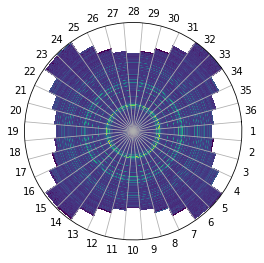

In [1]:
%matplotlib inline

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, FittingExperiment

spectral_data = FitSpectrum('../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_00001.dat', 90)
spectral_data.plot_polar()

Now plot a single specturm

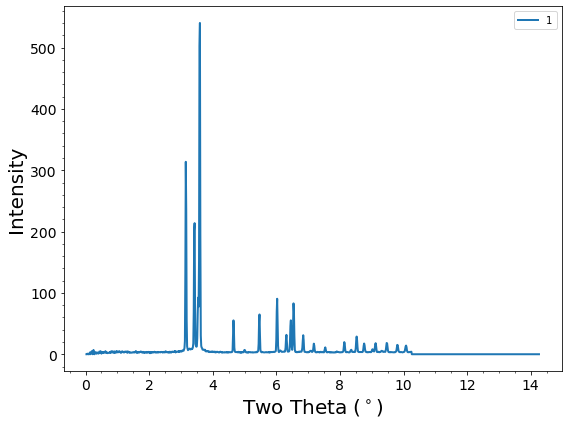

In [2]:
spectral_data.plot(1)

Zoom in a bit.

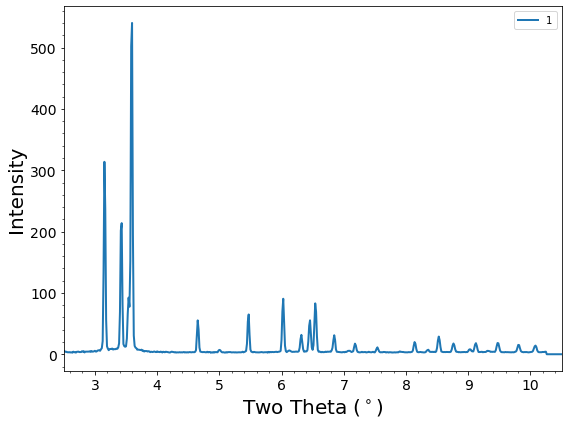

In [3]:
spectral_data.plot(1, x_range=(2.5, 10.5))

This looks reasonable. Since this is the first spectrum at the start of the experiment we expect high intensity hexagonal peaks and weak beta peaks. Using our calcualtions from above we can zoom in a section at a time and assign the peaks.

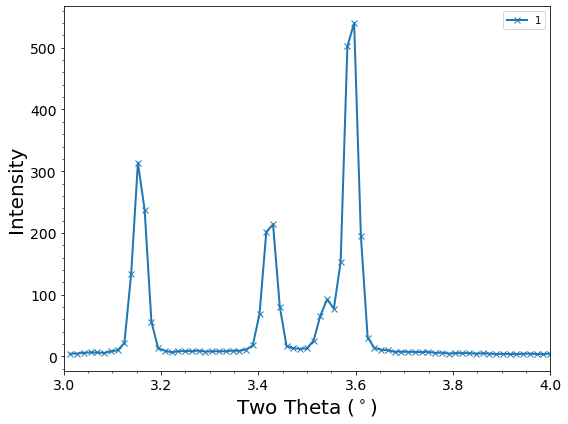

In [4]:
spectral_data.plot(1, x_range=(3, 4), show_points=True)

These peaks fit with being 10-10, 0002, a weak 110 and 10-11. We should fit 0002, 110 and 10-11 as a triplet due to their proximity.

We can quickly plot the peak params to check they are OK, then do the fits and check the fit results.

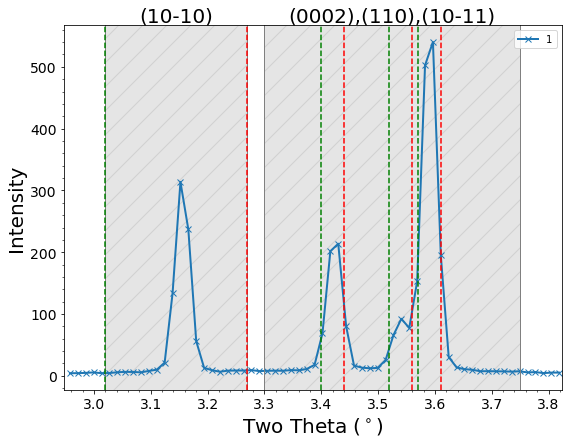

Fitting complete.


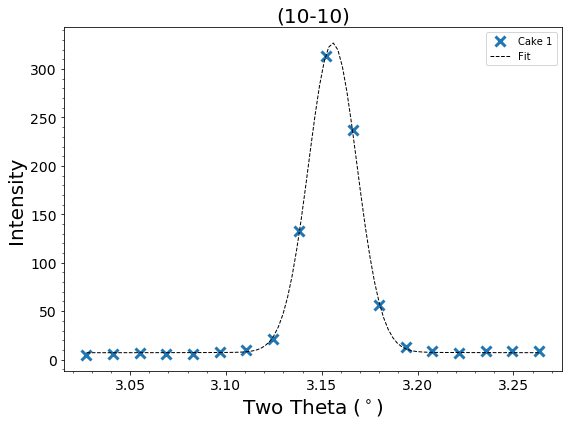

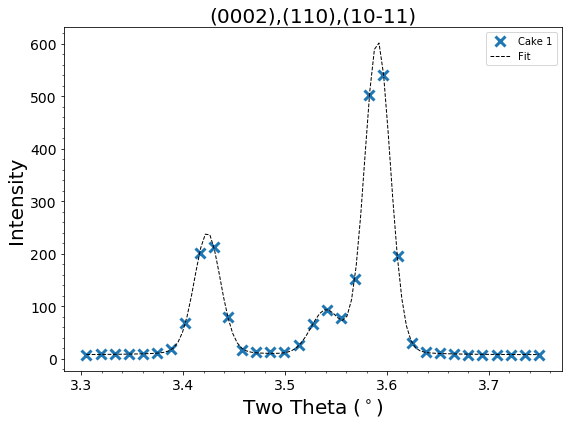

In [5]:
peak_params = [PeakParams('(10-10)', (3.02, 3.27)),
               PeakParams('(0002),(110),(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)])]

spectral_data.plot_peak_params(peak_params, 1, show_points=True)

spectral_data.fit_peaks(peak_params, 1)
spectral_data.plot_fit('(10-10)')
spectral_data.plot_fit('(0002),(110),(10-11)')

That looks reasonable. Now on to the next section of the spectrum.

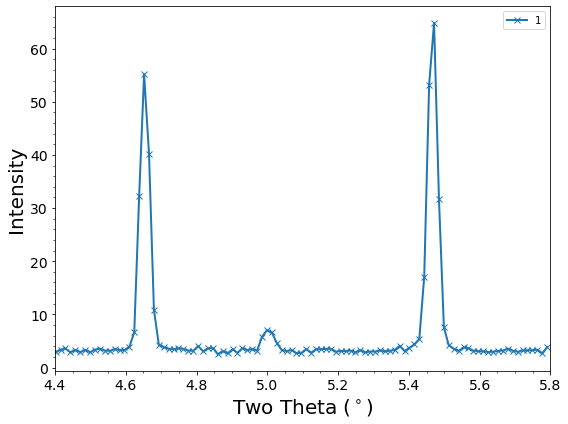

In [6]:
spectral_data.plot(1, x_range=(4.4, 5.8), show_points=True)

These look good for 10-12, 200 and 11-20. The 200 is a little way off our calculated value - this is due to alloying - inclusion of Vanadium in the beta phase. This is a constant percentage offset so we can apply this to find the other beta peaks.

Fitting complete.


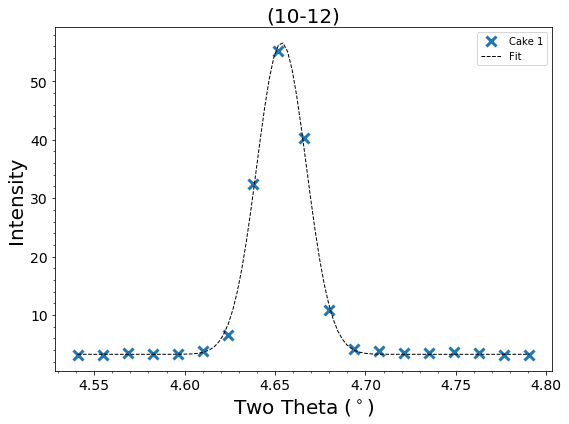

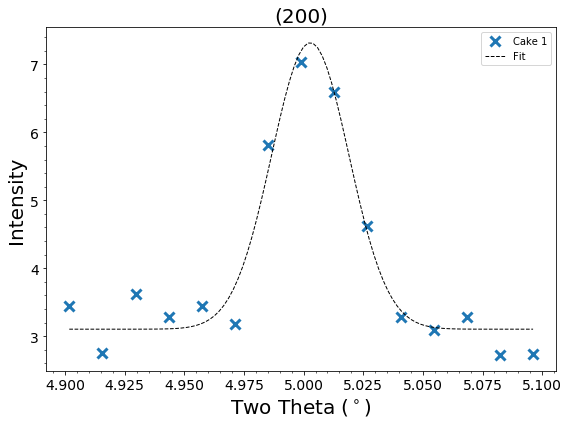

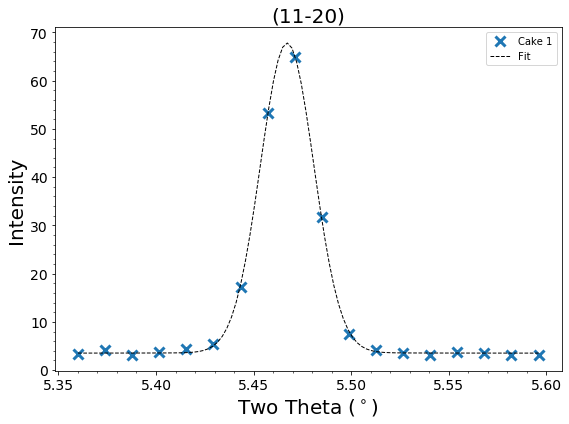

In [7]:
peak_params = [PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6))]

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

Now over to the higher end of the spectrum

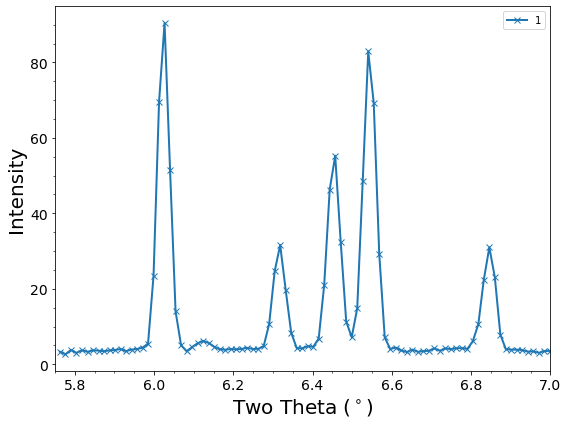

In [8]:
spectral_data.plot(1, x_range=(5.75, 7), show_points=True)

The first peak is the hexagonal 10-13.

So far the cubic peaks have been approximately 9% lower than our original estimate. Assuiming this is a constant offset this puts the 211 peak at 6.12° - this corresponds exactly to the second small peak here.

The next four peaks then correspond to 20-20, 11-22, 20-21 and 0004 in ascending order.

With the proximity of these peaks, they would be good to fit as a doublet, singlet, doublet and singlet.

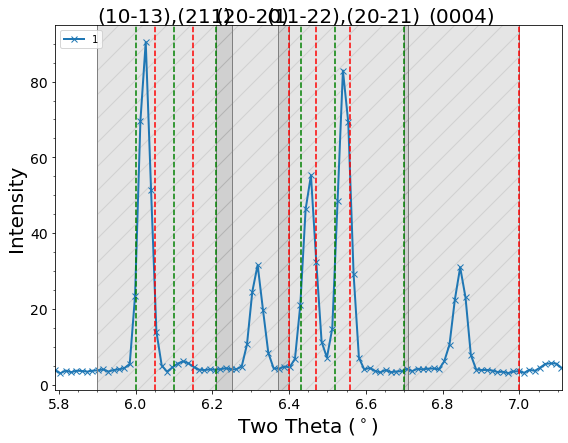

Fitting complete.


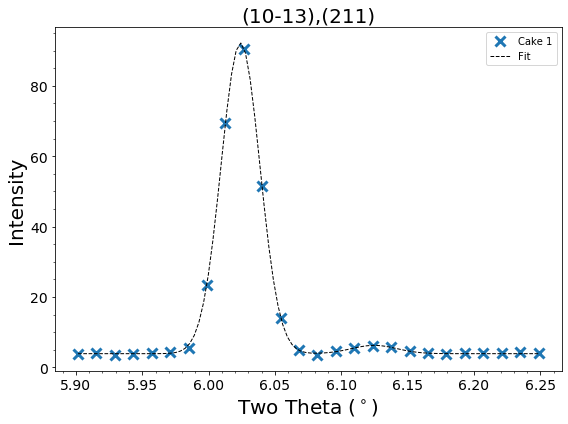

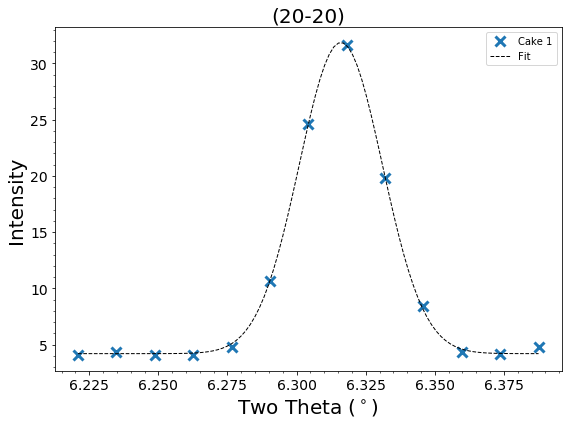

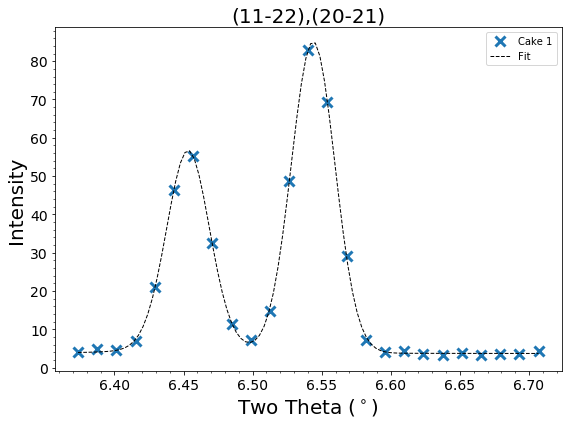

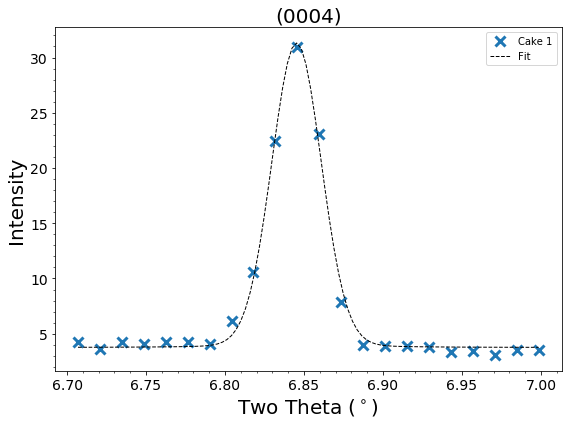

In [9]:
peak_params = [PeakParams('(10-13),(211)', (5.9, 6.25), [(6.00, 6.05), (6.10, 6.15)]),
               PeakParams('(20-20)', (6.21, 6.4)),
               PeakParams('(11-22),(20-21)',  (6.37, 6.71), [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams('(0004)',  (6.7, 7))]

spectral_data.plot_peak_params(peak_params, 1, show_points=True)

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

The 211 peak is tiny so likely has big error bars at the begining but as the experiment goes on it should grow.

Lets put all these peak params together and do a time fit.

## 4.3 Time fitting

Lets start by plotting every 100th frame to check nothing is odd before diving in and fitting the full data set.

In [10]:
frame_time = 1
file_string = '../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
first_cake_angle = 90
cakes_to_fit = 1
peak_params = [PeakParams('(10-10)', (3.02, 3.27)),
               PeakParams('(0002),(110),(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6)),
               PeakParams('(10-13),(211)', (5.9, 6.25), [(6.00, 6.05), (6.10, 6.15)]),
               PeakParams('(20-20)', (6.21, 6.4)),
               PeakParams('(11-22),(20-21)',  (6.37, 6.71), [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams('(0004)',  (6.7, 7))]
max_frame = 5657
merge_cakes = False
frames_to_fit = range(1, max_frame, 100)
experiment = FittingExperiment(frame_time, file_string,first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

experiment.run_analysis()

Processing 57 diffraction patterns.



Analysis complete.


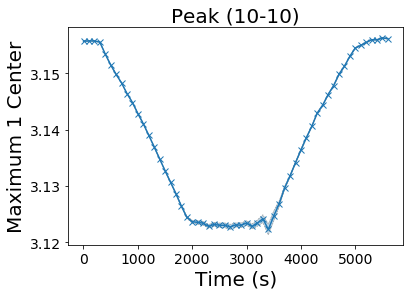

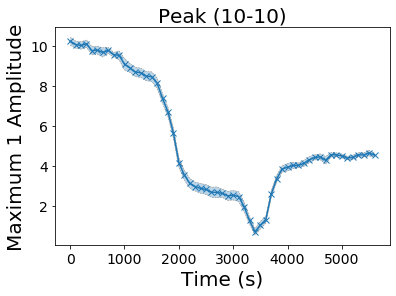

In [11]:
experiment.plot_fit_parameter("(10-10)", "maximum_1_center", show_points=True)
experiment.plot_fit_parameter("(10-10)", "maximum_1_amplitude", show_points=True)

We can see that the angle of the 10-10 peak shifted down with increasing temperature (due to the increase in lattice spacing with thermal energy) and decreased in amplitude - almost dissapearing during the applied deformation section of the experiment.

In [12]:
experiment.plot_fit_parameter('(0002),(110),(10-11)', "maximum_2_center", show_points=True) 
experiment.plot_fit_parameter('(0002),(110),(10-11)', "maximum_2_amplitude", show_points=True) 

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

The 110 peak, shows matching trends, the peak position shifts down a little but the amplitute greatly increases. Here we see the hexagonal ($\alpha$) structure being transformed to the cubic ($\beta$) structure.